# Case Study on Probability for Data Science

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [3]:
data=pd.read_csv('mushrooms.csv')

In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
data.shape

(8124, 23)

In [6]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Preprocessing

### a.Handling missing values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [10]:
data[['stalk-root']]

,stalk-root
0,e
1,c
2,c
3,e
4,e
...,...
8119,?
8120,?
8121,?
8122,?


In [11]:
(data['stalk-root']=='?').value_counts()

False    5644
True     2480
Name: stalk-root, dtype: int64

In [12]:
data[(data['stalk-root']=='?')][['stalk-root']]

,stalk-root
3984,?
4023,?
4076,?
4100,?
4104,?
...,...
8119,?
8120,?
8121,?
8122,?


#### There are 2480 missing values as '?' in 'Stalk-root'

In [13]:
data['stalk-root'] = data['stalk-root'].str.replace('?',data['stalk-root'].mode()[0])

#### The missing values are replaced with mode value of 'Stalk-root'

In [14]:
data[['stalk-root']]

,stalk-root
0,e
1,c
2,c
3,e
4,e
...,...
8119,b
8120,b
8121,b
8122,b


In [15]:
(data['stalk-root']=='?').value_counts()

False    8124
Name: stalk-root, dtype: int64

#### Now there is no missing value in dataset

### b.Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
data_en=data.apply(label_en.fit_transform)
data_en.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


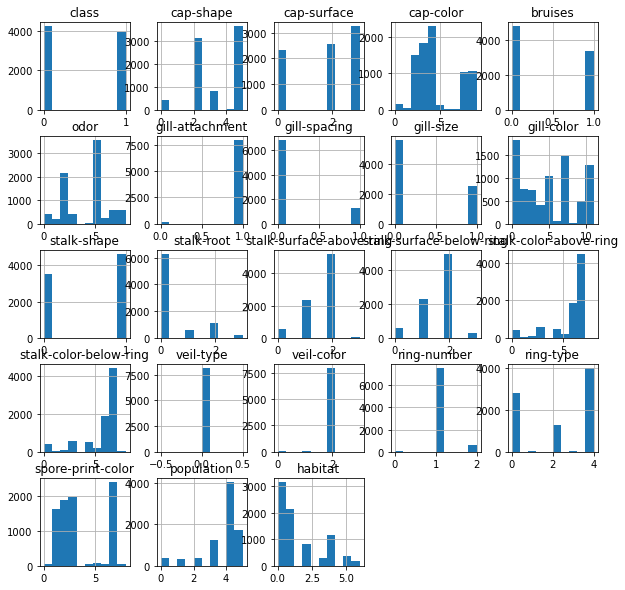

In [17]:
data_en.hist(figsize=(10,10))
plt.show()

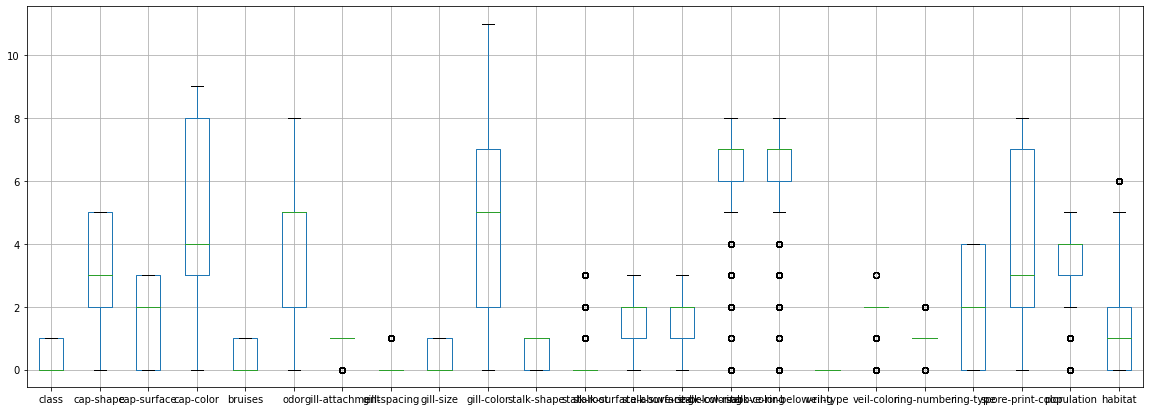

In [18]:
plt.figure(figsize=(20,7))
data_en.boxplot()
plt.show()

### c.Outlier handling 

In [19]:
for i in data_en.columns:
    descr= data_en[i].describe()
    IQR =descr['75%'] - descr['25%']
    upper_limit =  descr['75%'] + 1.5 * IQR
    lower_limit =  descr['25%'] - 1.5 * IQR  
#     outlier replacement with upper limit and lower limit instead of removing
#     data_en[i][data_en[i]>upper_limit] = upper_limit
#     data_en[i][data_en[i]<lower_limit] = lower_limit
    ind=data_en.loc[(data_en[i]>upper_limit)|(data_en[i]<lower_limit)].index
    data_en=data_en.drop(ind)

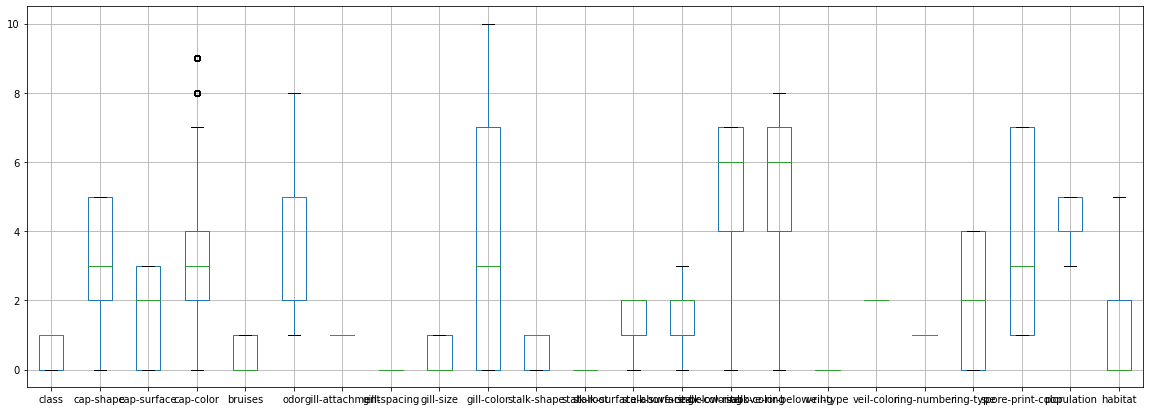

In [20]:
plt.figure(figsize=(20,7))
data_en.boxplot()
plt.show()

In [21]:
data_en.shape

(5216, 23)

## Splitting data into featureset and target

In [22]:
y = data_en[['class']]
X = data_en.drop('class', axis = 1)

### normalisation will give better result for classification algorithms

In [23]:
from sklearn.preprocessing import normalize
X = normalize(X)
X = pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
count,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.0,5216.000000,5216.000000,5216.000000,...,5216.000000,5216.000000,5216.000000,5216.0,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000
mean,0.237173,0.126392,0.267930,0.025192,0.280687,0.069107,0.0,0.023667,0.279861,0.046811,...,0.102812,0.358493,0.358146,0.0,0.138214,0.069107,0.146520,0.234970,0.295011,0.086038
std,0.100645,0.091113,0.164120,0.031952,0.130508,0.010974,0.0,0.031347,0.234531,0.029687,...,0.035742,0.135656,0.135894,0.0,0.021947,0.010974,0.114273,0.163604,0.063594,0.116389
min,0.000000,0.000000,0.000000,0.000000,0.055132,0.047946,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.095893,0.047946,0.000000,0.052058,0.157676,0.000000
25%,0.140028,0.000000,0.143499,0.000000,0.147442,0.062137,0.0,0.000000,0.000000,0.000000,...,0.071611,0.340503,0.336861,0.0,0.124274,0.062137,0.000000,0.089087,0.251976,0.000000
50%,0.205076,0.142494,0.240337,0.000000,0.298807,0.066082,0.0,0.000000,0.277350,0.062017,...,0.117851,0.401790,0.401790,0.0,0.132164,0.066082,0.165521,0.173458,0.279372,0.000000
75%,0.319438,0.195698,0.281092,0.062257,0.368605,0.072357,0.0,0.062137,0.503871,0.066667,...,0.129914,0.439219,0.439219,0.0,0.144715,0.072357,0.250982,0.433289,0.323423,0.137118
max,0.593391,0.390567,0.814822,0.088388,0.535720,0.141421,0.0,0.078326,0.718185,0.088388,...,0.176777,0.646997,0.646997,0.0,0.282843,0.141421,0.353553,0.548282,0.650945,0.492366


## Splitting Dataset into Train and test set

In [24]:
#importing train_test_split library from model_selection
from sklearn.model_selection import train_test_split
#creating the instances
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

## ML Algorithms

### a.Logistic Regression

In [25]:
#importing logistic regression from linear model
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred_log = logit_model.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [27]:
print("Accuracy is :", accuracy_score(y_test,y_pred_log))
print("Precision is :", precision_score(y_test,y_pred_log, average='macro'))
print("Recall is :", recall_score(y_test,y_pred_log, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred_log, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred_log))

Accuracy is : 0.9837164750957854
Precision is : 0.9837696544017879
Recall is : 0.9809768484535878
F1 score is : 0.9823447781906084



Confusion matrix

 [[368  11]
 [  6 659]]


### b.KNN- K Nearest Neighbor

In [28]:
from sklearn.neighbors import KNeighborsClassifier
#creating empty list for finding optimal K values(Accuracy values)
acc_value = []
#creating neighbors as 3 to 15
neighbors = np.arange(3,15)
for k in neighbors:
    # taking instances for KNN into variable name classifier using the method minkowski
    classifier = KNeighborsClassifier(n_neighbors=k, metric="minkowski")
    classifier.fit(X_train,y_train)
    y_pred_kn = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred_kn)
    acc_value.append(acc)

In [29]:
acc_value

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Text(0, 0.5, 'Accuracy values')

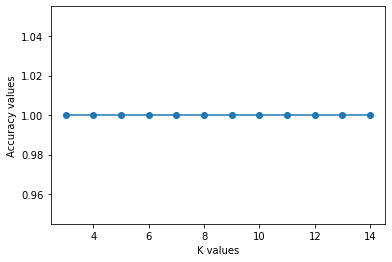

In [30]:
plt.plot(neighbors,acc_value,"o-")
plt.xlabel("K values")
plt.ylabel("Accuracy values")

In [31]:
classifier = KNeighborsClassifier(n_neighbors=3, metric="minkowski")
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)
print("Accuracy is :", accuracy_score(y_test,y_pred_knn))
print("Precision is :", precision_score(y_test,y_pred_knn, average='macro'))
print("Recall is :", recall_score(y_test,y_pred_knn, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred_knn, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred_knn))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
F1 score is : 1.0



Confusion matrix

 [[379   0]
 [  0 665]]


### c.SVM- Support Vector Machine

In [32]:
#importing SVC from SVM
from sklearn.svm import SVC
svm_rbf=SVC(kernel='rbf')
svm_rbf.fit(X_train,y_train)
y_pred_sv=svm_rbf.predict(X_test)

In [33]:
print("Accuracy is :", accuracy_score(y_test,y_pred_sv))
print("Precision is :", precision_score(y_test,y_pred_sv, average='macro'))
print("Recall is :", recall_score(y_test,y_pred_sv, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred_sv, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred_sv))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
F1 score is : 1.0



Confusion matrix

 [[379   0]
 [  0 665]]


### d.Decision Tree

In [34]:
#importing DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
dec_tree_model=DecisionTreeClassifier()
dec_tree_model.fit(X_train,y_train)
y_pred_dt=dec_tree_model.predict(X_test)
print("Accuracy is :", accuracy_score(y_test,y_pred_dt))
print("Precision is :", precision_score(y_test,y_pred_dt, average='macro'))
print("Recall is :", recall_score(y_test,y_pred_dt, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred_dt, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred_dt))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
F1 score is : 1.0



Confusion matrix

 [[379   0]
 [  0 665]]


### e.Random Forest Model

In [35]:
#importing RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
rand_f=RandomForestClassifier()
rand_f.fit(X_train,y_train)
y_pred_rf=rand_f.predict(X_test)
print("Accuracy is :", accuracy_score(y_test,y_pred_rf))
print("Precision is :", precision_score(y_test,y_pred_rf, average='macro'))
print("Recall is :", recall_score(y_test,y_pred_rf, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred_rf, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred_rf))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
F1 score is : 1.0



Confusion matrix

 [[379   0]
 [  0 665]]


In [36]:
pd.Series(rand_f.feature_importances_,index=X.columns).sort_values(ascending=False)*100

3     25.969231
18    14.032125
8     12.048185
4     11.322592
21     7.676568
19     7.538381
11     5.928224
7      4.561079
12     3.472678
9      2.864670
1      1.255273
2      1.181194
20     1.079906
16     0.269628
17     0.244158
13     0.198659
5      0.171481
14     0.139355
0      0.046612
6      0.000000
10     0.000000
15     0.000000
dtype: float64

cap-shape, gill-spacing, stalk-root, veil-type, veil-color, ring-number, gill-attachment : These columns do not have much role in data. So, maybe removed. Almost all models are already overfitting. So, doing nothing now.

### f.Gradient Boosting

In [37]:
#importing GradientBoostingClassifier from sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier
grad_b=GradientBoostingClassifier()
grad_b.fit(X_train, y_train)
y_pred_gb=grad_b.predict(X_test)
print("Accuracy is :", accuracy_score(y_test,y_pred_gb))
print("Precision is :", precision_score(y_test,y_pred_gb, average='macro'))
print("Recall is :", recall_score(y_test,y_pred_gb, average='macro'))
print("F1 score is :", f1_score(y_test,y_pred_gb, average='macro'))
print('\n\n\nConfusion matrix\n\n',confusion_matrix(y_test,y_pred_gb))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
F1 score is : 1.0



Confusion matrix

 [[379   0]
 [  0 665]]


## Naïve Bayes’ Classifier Algorithms

### a.Fitting Gaussian Naive Bayes to the Training Set:

In [38]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [39]:
y_pred_g=classifier.predict(X_test)

In [40]:
co_mat=confusion_matrix(y_test,y_pred_g)
acc_g=accuracy_score(y_pred_g,y_test)
print(acc_g)
co_mat

0.9865900383141762


array([[365,  14],
       [  0, 665]], dtype=int64)

### b.Fitting Bernoulli Naive Bayes to the Training Set:

In [41]:
from sklearn.naive_bayes import BernoulliNB
ber=BernoulliNB()
ber.fit(X_train,y_train)
y_pred_ber=ber.predict(X_test)
co_mat_ber=confusion_matrix(y_test,y_pred_ber)
acc_ber=accuracy_score(y_pred_ber,y_test)
print(acc_ber)
co_mat_ber

0.9875478927203065


array([[366,  13],
       [  0, 665]], dtype=int64)

### c.Fitting Multinomial Naive Bayes to the Training Set:

In [42]:
from sklearn.naive_bayes import MultinomialNB
mul=MultinomialNB()
mul.fit(X_train,y_train)
y_pred_mul=mul.predict(X_test)
co_mat_mul=confusion_matrix(y_test,y_pred_mul)
acc_mul=accuracy_score(y_pred_mul,y_test)
print(acc_mul)
co_mat_mul

0.803639846743295


array([[174, 205],
       [  0, 665]], dtype=int64)

### After normalization, in supervised Machine learning models, all models except Logistic regression provide 100% accuracy. So, they are overfitting. In Naive Bayes classifier, Bernoulli gives a better result(98.75%).